# Question 2

A team of plantation planners are concerned about the yield of oil palm trees, which seems to fluctuate. They have collected a set of data and needed help in analysing on how external factors influence fresh fruit bunch (FFB) yield. Some experts are of opinion that the flowering of oil palm tree determines the FFB yield, and are linked to the external factors. Perform the analysis, which requires some study on the background of oil palm tree physiology.

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
pwd()

'C:\\Users\\v28si\\Desktop\\CV\\Interviews\\ACE resources'

In [3]:
df_palm = pd.read_csv('C:\\Users\\v28si\\Desktop\\CV\\Interviews\\ACE resources\\PreScreen_r3_pw - 1234\\PreScreen_r3\\palm_ffb.csv')

In [4]:
#view first 5 row of data
df_palm.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [5]:
df_palm.shape

(130, 9)

In [6]:
# Check for missing data 
df_palm.isnull().sum()

Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64

In [7]:
df_palm.empty

False

In [8]:
#check data type for each variable
df_palm.dtypes

Date              object
SoilMoisture     float64
Average_Temp     float64
Min_Temp         float64
Max_Temp         float64
Precipitation    float64
Working_days       int64
HA_Harvested     float64
FFB_Yield        float64
dtype: object

# Descriptive Analysis 

In [10]:
df_palm.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


# Variance and Standard Deviation

In [11]:
#variance population
print(np.var(df_palm))
    

SoilMoisture     3.265754e+03
Average_Temp     4.210750e-01
Min_Temp         4.710302e-01
Max_Temp         1.156651e+00
Precipitation    6.388487e+03
Working_days     1.524024e+00
HA_Harvested     1.177051e+09
FFB_Yield        7.877272e-02
dtype: float64


In [12]:
#standard deviation
print(np.std(df_palm))

SoilMoisture        57.146772
Average_Temp         0.648903
Min_Temp             0.686316
Max_Temp             1.075477
Precipitation       79.928010
Working_days         1.234514
HA_Harvested     34308.173153
FFB_Yield            0.280665
dtype: float64


# Parametric Test

In [13]:
# Correlation between variables
cormat = df_palm.corr()
round(cormat,5)

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.00000,-0.64988,0.01584,-0.49994,0.55200,-0.05701,-0.32654,-0.00318
Average_Temp,-0.64988,1.00000,0.18040,0.76108,-0.36939,0.07632,0.44652,-0.00549
Min_Temp,0.01584,0.18040,1.00000,-0.12475,0.34594,0.06841,0.02440,0.10383
Max_Temp,-0.49994,0.76108,-0.12475,1.00000,-0.46112,-0.03911,0.31483,-0.07120
Precipitation,0.55200,-0.36939,0.34594,-0.46112,1.00000,0.12790,-0.26587,0.28960
Working_days,-0.05701,0.07632,0.06841,-0.03911,0.12790,1.00000,0.04888,0.11636
HA_Harvested,-0.32654,0.44652,0.02440,0.31483,-0.26587,0.04888,1.00000,-0.35022
FFB_Yield,-0.00318,-0.00549,0.10383,-0.07120,0.28960,0.11636,-0.35022,1.00000


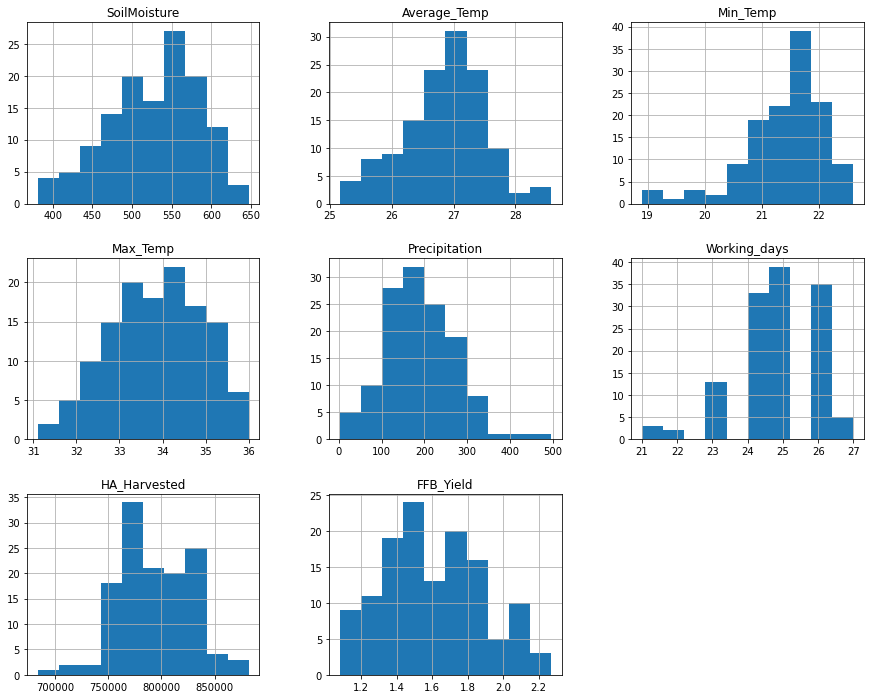

In [14]:
df_palm.hist(figsize=(15,12))
plt.show()

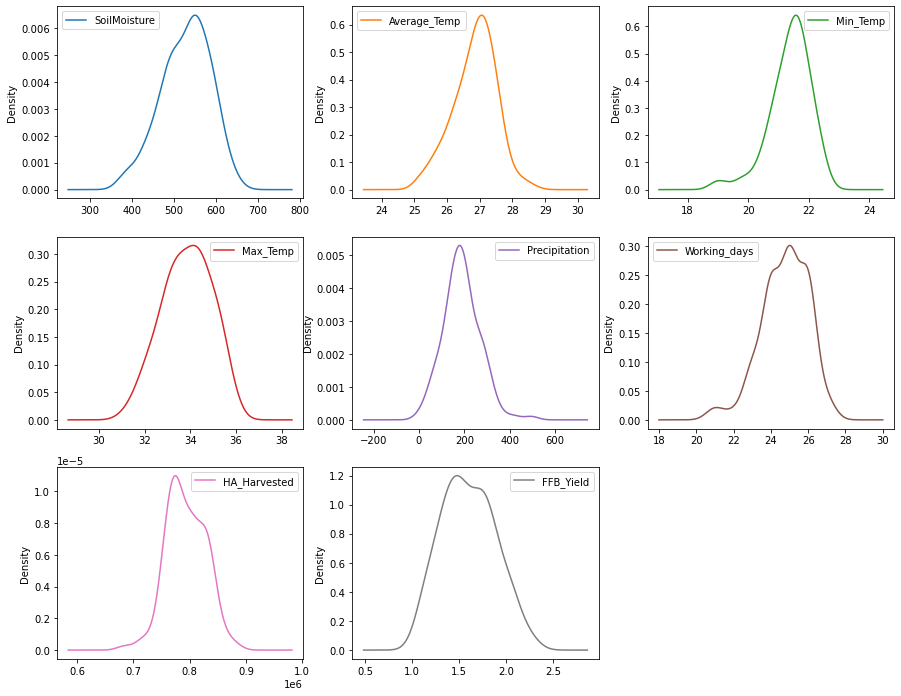

In [15]:
df_palm.plot(kind='density', subplots=True, layout=(3,3),sharex=False, figsize=(15,12))
plt.show()

In [31]:
df_palm2 = df_palm.drop(['Date'], axis = 1)

In [17]:
df_palm2.head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


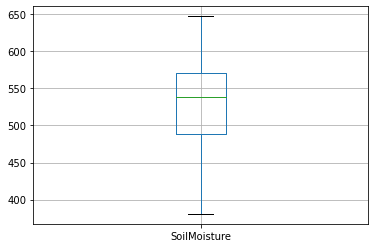

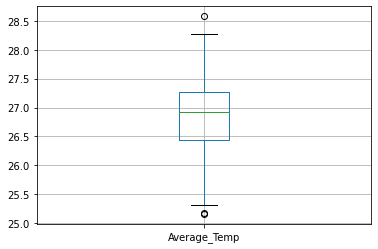

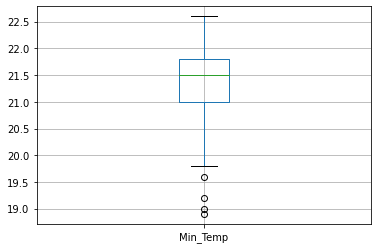

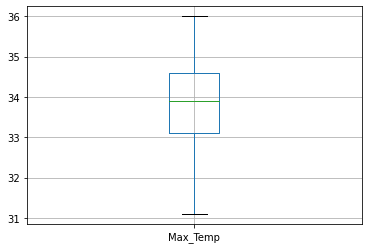

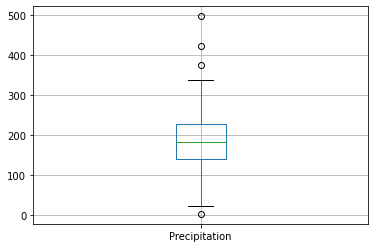

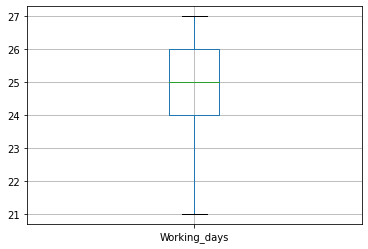

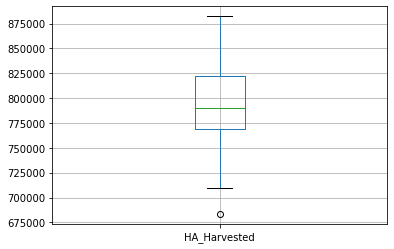

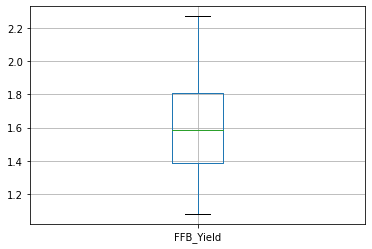

In [24]:
for column in df_palm2:
    plt.figure()
    df_palm2.boxplot([column])
plt.show()

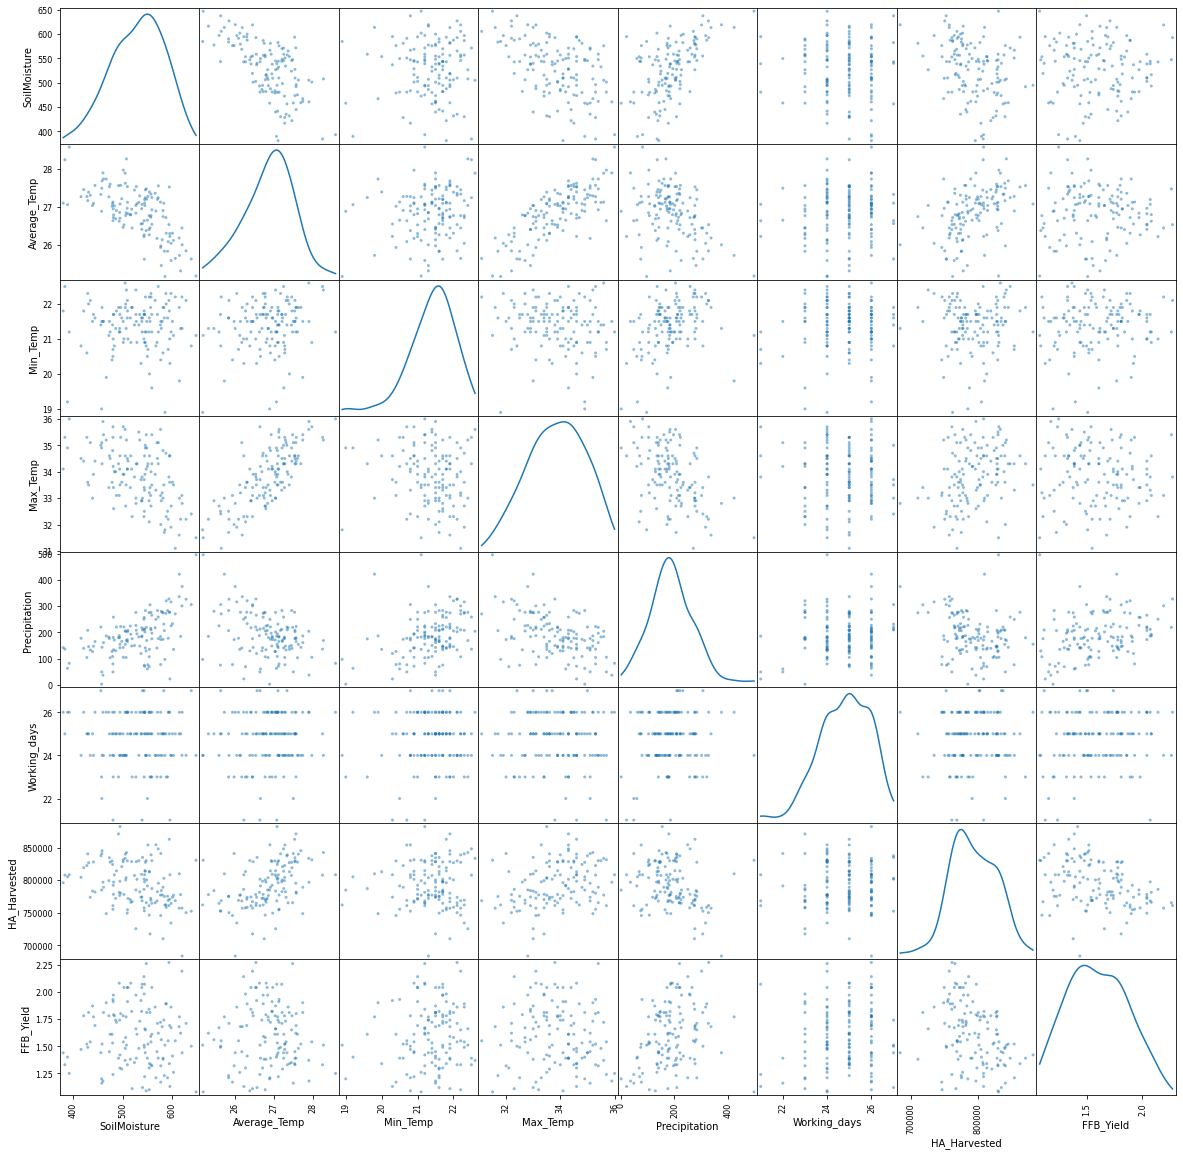

In [18]:
pd.plotting.scatter_matrix(df_palm2,figsize = (20,20),diagonal='kde',)
plt.show()

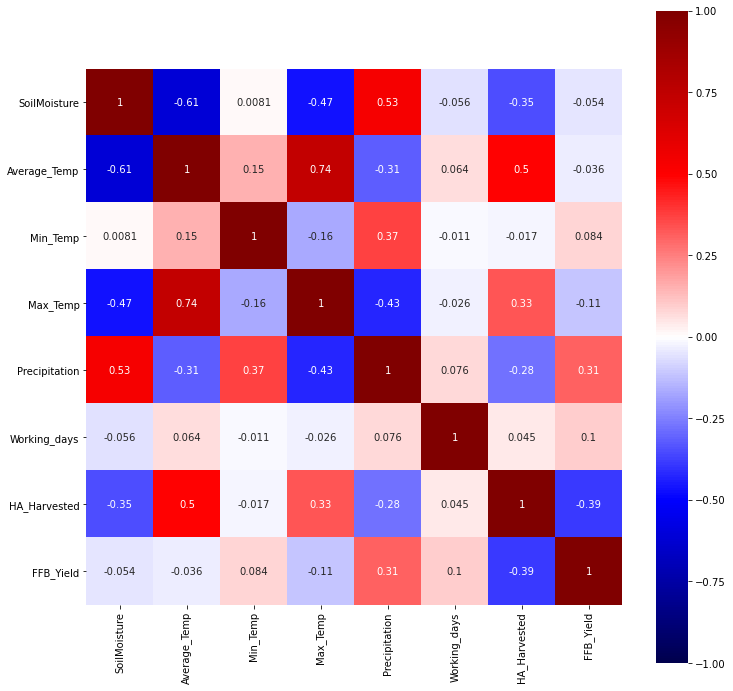

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(df_palm2.corr(method='spearman'),annot = True, fmt='.2g',vmin=-1, vmax=1, center= 0,cmap= 'seismic',square=True)
plt.show()

# Feature Selection

In [20]:
palm_clean=df_palm.drop(['Date'], axis=1)

In [21]:
palm_clean.head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [22]:
X = palm_clean.iloc[:,0:7]
X.head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested
0,616.4,25.306452,21.3,32.2,184.4,25,777778.3951
1,568.9,26.165517,20.9,35.1,140.2,23,767988.2759
2,577.6,25.448387,21.3,32.9,280.4,25,783951.9231
3,581.1,26.903333,20.6,34.8,173.3,25,788987.0504
4,545.4,27.241935,20.9,35.0,140.6,25,813659.7222


In [23]:
y = palm_clean.iloc[:,-1] #dependent variable
y.head()

0    1.62
1    1.45
2    1.56
3    1.39
4    1.44
Name: FFB_Yield, dtype: float64

# Feature Selection - Pearson’s Correlation Coefficient

In [30]:
''' This section demonstrates feature selection for a regression problem 
that as numerical inputs and numerical outputs. Feature selection is performed 
using Pearson’s Correlation Coefficient via the f_regression() function.'''

# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# define feature selection
selector = SelectKBest(score_func=f_regression, k=4)

# apply feature selection
selector.fit(X,y)

X_selected = selector.transform(X)
print(X_selected.shape)

X.columns[selector.get_support(indices=True)]
vector_names = list(X.columns[selector.get_support(indices=True)])
print(vector_names)



(130, 4)
['Min_Temp', 'Precipitation', 'Working_days', 'HA_Harvested']


# Implementing Forward Selection

In [25]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=4,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [26]:
sfs.fit(X, y)
sfs.k_feature_names_     # to get the final set of features

('SoilMoisture', 'Average_Temp', 'Precipitation', 'HA_Harvested')

Implementing Backward elimination using built-in functions in Python:
The same SequentialFeatureSelector()function can be used to perform backward elimination by disabling the forward argument.

In [138]:
#Sequential backward selection(sbs)
sbs = SFS(LinearRegression(),
         k_features=4,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X, y)
sbs.k_feature_names_

('SoilMoisture', 'Average_Temp', 'Precipitation', 'HA_Harvested')

# Using  RandomForestRegressor in forward Selection (comparison to above)

In [27]:
#Forward feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#I am going to use RandomForestRegressor algoritham as an estimator. Your can select other regression alogritham as well.
from sklearn.ensemble import RandomForestRegressor

model=sfs(RandomForestRegressor(),k_features=4,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')
model.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    4.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    4.2s finished

[2021-08-24 05:21:39] Features: 1/4 -- score: -0.12837200644574565[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    3.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.2s finished

[2021-08-24 05:21:42] Features: 2/4 -- score: -0.1961409826452814[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished

[2021-08-24 05:21:46] Features: 3/4 -- score: 0.06728018880949412[Parallel(n_jobs=-1)]: Using back

SequentialFeatureSelector(estimator=RandomForestRegressor(), k_features=4,
                          n_jobs=-1, scoring='r2', verbose=2)

In [28]:
#Get the selected feature index.
model.k_feature_idx_

(0, 4, 5, 6)

In [29]:
#Get the column name for the selected feature.
model.k_feature_names_

('SoilMoisture', 'Precipitation', 'Working_days', 'HA_Harvested')

# Embedded Method - First Attemp (Failed)

In [165]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 835.349314
Best score using built-in LassoCV: 0.115129


In [162]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 1 variables and eliminated the other 6 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

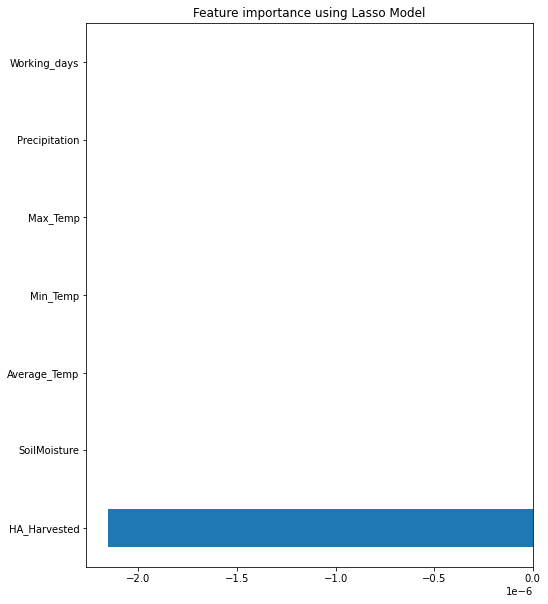

In [163]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# Embedded Method (LassoCV) - Second Attemp after data normalization

In [279]:
df_palm3 = df_palm.copy()

In [280]:
df_palm3 = df_palm3.drop( ['Date'],axis=1)

In [281]:
df_palm3.head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [282]:
#dependent variable
X = df_palm3.iloc[:,0:7]
X.head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested
0,616.4,25.306452,21.3,32.2,184.4,25,777778.3951
1,568.9,26.165517,20.9,35.1,140.2,23,767988.2759
2,577.6,25.448387,21.3,32.9,280.4,25,783951.9231
3,581.1,26.903333,20.6,34.8,173.3,25,788987.0504
4,545.4,27.241935,20.9,35.0,140.6,25,813659.7222


In [283]:
#dependent variable
y = palm_clean.iloc[:,-1] 
y.head()

0    1.62
1    1.45
2    1.56
3    1.39
4    1.44
Name: FFB_Yield, dtype: float64

In [284]:
# Normalization uing min max scaller
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()

# transform data
scaled = scaler.fit_transform(X)
print(scaled)

[[0.88409602 0.0433635  0.64864865 0.2244898  0.36915604 0.66666667
  0.47452655]
 [0.70592648 0.2944102  0.54054054 0.81632653 0.27970047 0.33333333
  0.42528599]
 [0.73855964 0.08484163 0.64864865 0.36734694 0.56344869 0.66666667
  0.50557703]
 [0.75168792 0.51002388 0.45945946 0.75510204 0.34669095 0.66666667
  0.5309018 ]
 [0.61777944 0.60897436 0.54054054 0.79591837 0.28051002 0.66666667
  0.65499589]
 [0.56939235 0.57236677 0.67567568 0.89795918 0.36490589 0.5
  0.73626367]
 [0.61515379 0.54864253 0.62162162 0.57142857 0.40396681 0.83333333
  0.65909794]
 [0.70967742 0.59671946 0.75675676 0.69387755 0.56911556 0.83333333
  0.49716555]
 [0.71642911 0.70094897 0.62162162 0.81632653 0.3527626  0.66666667
  0.56233994]
 [0.69242311 0.64291101 0.86486486 0.57142857 0.43614653 0.5
  0.4107131 ]
 [0.77306827 0.45547386 0.91891892 0.73469388 0.54766242 0.66666667
  0.39454188]
 [0.81245311 0.1234917  0.62162162 0.32653061 0.45112325 0.5
  0.40695524]
 [0.61065266 0.13386124 0.75675676 0.

In [285]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(scaled, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(scaled,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.003654
Best score using built-in LassoCV: 0.214857


In [286]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 5 variables and eliminated the other 2 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

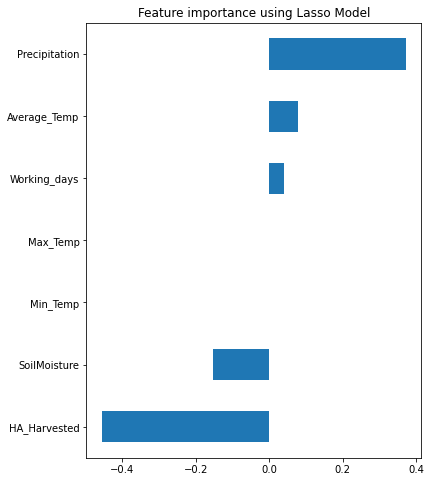

In [290]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 8.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Conclusion:
After few attemps of different feature selection methods, HA_Harvested and Precipitation variable appears in all the feature selection method as top two external factors that influence the fresh fruit bunch (FFB) yield, followed by SoilMoisture.